In [17]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [49]:
import mlxtend
import numpy as np
import pandas as pd
import re

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [28]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset

### Importando o dataset

full dataset outputed by the data understanding

In [2]:
ratingsDF = pd.read_pickle("..\\ProcessedData\\df.pkl")

In [3]:
ratingsDF.head()

,uid,id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,1997-10-01 23:06:30,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,1998-01-04 04:37:51,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,1997-11-10 05:03:55,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,1997-10-10 17:16:33,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Número de usuários na base %i" % ratingsDF['uid'].nunique())

Número de usuários na base 943


In [5]:
print("Número de filmes na base %i" % ratingsDF['id'].nunique())

Número de filmes na base 1664


### Criando os vetores de features dos filmes

Cada filme será representado pelas notas que cada um dos usuários da base deu para aquele filme. O que siginifica que **cada filme será representado por vetores esparsos de tamanho 943**.

Sabemos da exploração que não há duplicatas para a chave **uid, id**, então:

In [6]:
ratings_id = ratingsDF.groupby(['id']).aggregate({'rating': len})

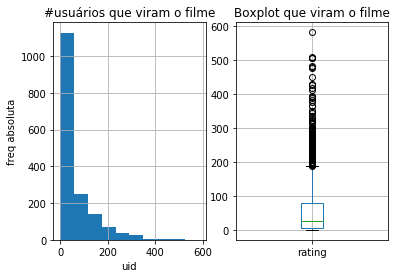

In [7]:
plt.figure(),
plt.subplot(1,2,1)
ratings_id.rating.hist()
plt.grid(True)
plt.title("#usuários que viram o filme")
plt.xlabel("uid")
plt.ylabel("freq absoluta")

plt.subplot(1,2,2)
ratings_id.boxplot()
plt.title("Boxplot que viram o filme")
plt.show()

In [8]:
print("Moda do número de usuários que viram o filme: %i" % ratings_id.rating.mode())

Moda do número de usuários que viram o filme: 1


In [9]:
print("Número de filmes com apenas uma avaliação: %i" % (ratings_id.rating == 1).sum())

Número de filmes com apenas uma avaliação: 135


In [10]:
df_pivoted = pd.pivot_table(ratingsDF, columns=['uid'], values=['rating'], index=['id'], aggfunc=np.max)

In [11]:
df_pivoted.fillna(0, inplace=True)

In [33]:
df_pivoted.head(10)

rating                                              ...                  \
uid    1    2    3    4    5    6    7    8    9    10  ...   934  935  936   
id                                                      ...                   
1      5.0  4.0  0.0  0.0  4.0  4.0  0.0  0.0  0.0  4.0 ...   2.0  3.0  4.0   
2      3.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0 ...   4.0  0.0  0.0   
3      4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  4.0   
4      3.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0 ...   5.0  0.0  0.0   
5      3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
6      5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0 ...   0.0  0.0  5.0   
7      4.0  0.0  0.0  0.0  0.0  2.0  5.0  3.0  4.0  4.0 ...   0.0  0.0  4.0   
8      1.0  0.0  0.0  0.0  0.0  4.0  5.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
9      5.0  0.0  0.0  0.0  0.0  4.0  5.0  0.0  0.0  4.0 ...   0.0  1.0  4.0   
10     3.0  2.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

                                        
uid  937  938  939  940  941  942  943  
id                                      
1    0.0  4.0  0.0  0.0  5.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  5.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  2.0  0.0  0.0  0.0  
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7    0.0  4.0  0.0  4.0  4.0  0.0  0.0  
8    0.0  0.0  0.0  5.0  0.0  0.0  0.0  
9    5.0  3.0  5.0  3.0  0.0  0.0  3.0  
10   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 943 columns]

In [39]:
df_pivoted_sparse = df_pivoted.rating.reset_index()

### Decomposição do vetor de features

#### PCA

In [68]:
pca_dim = 5

In [69]:
pca = PCA(n_components=pca_dim).fit(df_pivoted_sparse)

In [70]:
pca.explained_variance_ratio_

array([9.97155750e-01, 4.24409581e-04, 1.51730072e-04, 1.20133447e-04,
       6.43633289e-05])

a variância ao longo das 5 primeiras dimensões já é da ordem de **e-5**. Se reduzirmos o número de dimensões para apenas 2 temos:

In [74]:
pca_dim = 2
pca = PCA(n_components=pca_dim).fit(df_pivoted_sparse)

In [81]:
print("energia conservada pelas duas primeiras componentes do PCA %f" % pca.explained_variance_ratio_.sum()) 

energia conservada pelas duas primeiras componentes do PCA 0.997580


In [86]:
df_pca = pd.DataFrame(pca.transform(df_pivoted_sparse))

### Clusterização

Posdemos executar a clusterização no espaço não transformado pelo PCA enquanto isso não gerar problemas de desempenho. Pode-se usar o PCA para fazer a projeção para 2D e faciliar a visualização dos clustes

In [95]:
n_clusters=5

In [96]:
%%time
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pivoted_sparse)

Wall time: 1.32 s


In [97]:
#Scaling of data
# ss = StandardScaler()
# ss.fit_transform(df_pivoted_sparse)

clust_labels = kmeans.labels_

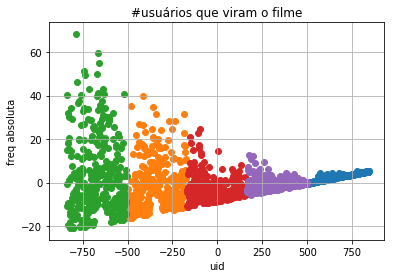

In [98]:
plt.figure(),
for clusterIsx in range(0, n_clusters):
    in_cluster = df_pca.iloc[clust_labels == clusterIsx]
    plt.scatter(in_cluster[0], in_cluster[1])
plt.grid(True)
plt.title("#usuários que viram o filme")
plt.xlabel("uid")
plt.ylabel("freq absoluta")
plt.show()